# Importing Libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from typing import List, Dict
from pprint import pprint
import os
from tqdm import tqdm

In [70]:
# import local modules from upper directory
import sys
sys.path.append('../')
from log import logger


## Listing Directories

In [71]:
DIR_PATTERN = "../log/*.txt"

In [72]:
dirs : List = glob(DIR_PATTERN)

In [73]:
def convert_file_info(filepath : str):
    
    with open(filepath, "r") as f:
        lines = f.readlines()
        lines[1] = lines[1].replace("'", '')
        lines[1] = lines[1].replace(',', '')
        lines[1] = lines[1].replace('[', '')
        lines[1] = lines[1].replace(']', '')
        
        line_1_list = []
        for word in lines[1].split(" "):
            line_1_list.append(int(word))
        
        lines[3] = lines[3].replace("'", '')
        lines[3] = lines[3].replace(',', '')
        lines[3] = lines[3].replace('[', '')
        lines[3] = lines[3].replace(']', '')

        line_2_list = []
        for word in lines[3].split(") ("):
            word = word.replace('(', '')
            line_2_list.append(int(word.split(" ")[0]))
        
        return line_1_list, line_2_list
        

In [74]:
master, true_order = convert_file_info(dirs[0])

In [75]:
for i in range(len(master)):
    print(f"{master[i]}\t{true_order[i]}")

4404	4449
4421	4448
4416	4447
4423	4446
4407	4445
4409	4444
4446	4443
4436	4442
4359	4441
4411	4440
4427	4439
4429	4438
4364	4437
4438	4436
4449	4435
4444	4434
4387	4433
4419	4432
4337	4431
4422	4430
4434	4429
4447	4428
4443	4427
4314	4426
4379	4425
4398	4424
4297	4423
4324	4422
4437	4421
4417	4420
4399	4419
4392	4418
4442	4417
4363	4416
4412	4415
4378	4414
4344	4413
4347	4412
4440	4411
4309	4410
4372	4409
4448	4408
4415	4407
4420	4406
4375	4405
4401	4404
4400	4403
4426	4402
4366	4401
4386	4400
4311	4399
4425	4398
4374	4397
4342	4396
4424	4395
4354	4394
4389	4393
4441	4392
4388	4391
4332	4390
4382	4389
4326	4388
4439	4387
4384	4386
4445	4385
4308	4384
4391	4383
4435	4382
4349	4381
4394	4380
4253	4379
4350	4378
4334	4377
4428	4376
4418	4375
4327	4374
4341	4373
4414	4372
4402	4371
4410	4370
4368	4369
4237	4368
4431	4367
4299	4366
4329	4365
4268	4364
4357	4363
4269	4362
4340	4361
4323	4360
4284	4359
4377	4358
4267	4357
4397	4356
4430	4355
4376	4354
4385	4353
4333	4352
4331	4351
4312	4350


## Using absolute rank as an indicator

We are using the absolute difference in rank to calculate how far away the value is from it's ideal rank. 

In [76]:
def calculate_difference(master : List, true_order : List):
    return [np.abs(master[i] - true_order[i]) for i in range(len(master))]

In [77]:
diff = calculate_difference(master, true_order)

In [78]:
pprint(diff)

[45,
 27,
 31,
 23,
 38,
 35,
 3,
 6,
 82,
 29,
 12,
 9,
 73,
 2,
 14,
 10,
 46,
 13,
 94,
 8,
 5,
 19,
 16,
 112,
 46,
 26,
 126,
 98,
 16,
 3,
 20,
 26,
 25,
 53,
 3,
 36,
 69,
 65,
 29,
 101,
 37,
 40,
 8,
 14,
 30,
 3,
 3,
 24,
 35,
 14,
 88,
 27,
 23,
 54,
 29,
 40,
 4,
 49,
 3,
 58,
 7,
 62,
 52,
 2,
 60,
 76,
 8,
 53,
 32,
 14,
 126,
 28,
 43,
 52,
 43,
 47,
 32,
 42,
 31,
 40,
 1,
 131,
 64,
 67,
 36,
 96,
 6,
 93,
 21,
 37,
 75,
 19,
 90,
 41,
 75,
 22,
 32,
 19,
 20,
 38,
 41,
 33,
 5,
 33,
 66,
 44,
 2,
 53,
 14,
 34,
 12,
 66,
 16,
 49,
 119,
 74,
 63,
 6,
 70,
 50,
 40,
 73,
 75,
 4,
 35,
 47,
 60,
 19,
 46,
 73,
 14,
 16,
 190,
 87,
 55,
 84,
 15,
 101,
 57,
 25,
 84,
 27,
 50,
 10,
 13,
 129,
 33,
 101,
 29,
 69,
 50,
 22,
 24,
 1,
 72,
 16,
 11,
 43,
 0,
 83,
 100,
 32,
 59,
 46,
 121,
 10,
 73,
 7,
 141,
 16,
 13,
 29,
 155,
 84,
 39,
 3,
 86,
 16,
 102,
 45,
 1,
 27,
 19,
 96,
 59,
 52,
 72,
 63,
 17,
 55,
 102,
 65,
 96,
 28,
 83,
 76,
 40,
 12,
 7,
 21,
 119,
 91,
 

In [79]:
def write_diff(diff : List):
    length : int = len(diff)
    with open(f"./differences/{length}.txt", "w") as f:
        for i in range(length):
            f.write(f"{diff[i]}\n")

In [80]:
write_diff(diff)

### Running for all files

In [81]:
for file in tqdm(dirs):
    master, true_order = convert_file_info(file)
    diff = calculate_difference(master, true_order)
    write_diff(diff)

100%|██████████| 500/500 [00:01<00:00, 354.69it/s]


## Calculating Mean difference in rank

In [82]:
DIFF_DIR_PATTERN = "./differences/*.txt"
diff_files : List = glob(DIFF_DIR_PATTERN)

In [88]:
print(diff_files[0])

./differences/3650.txt


In [93]:
# calculate mean of each file
means : dict = {}
for file in diff_files:
    with open(file, "r") as f:
        spl = file.split("/")[-1]
        spl = spl.split(".")
        spl = int(spl[0])
        lines = f.readlines()
        mean = np.mean([int(line) for line in lines])
        means[spl] = mean

In [94]:
df_means = pd.DataFrame(means.items(), columns=["file", "mean"])

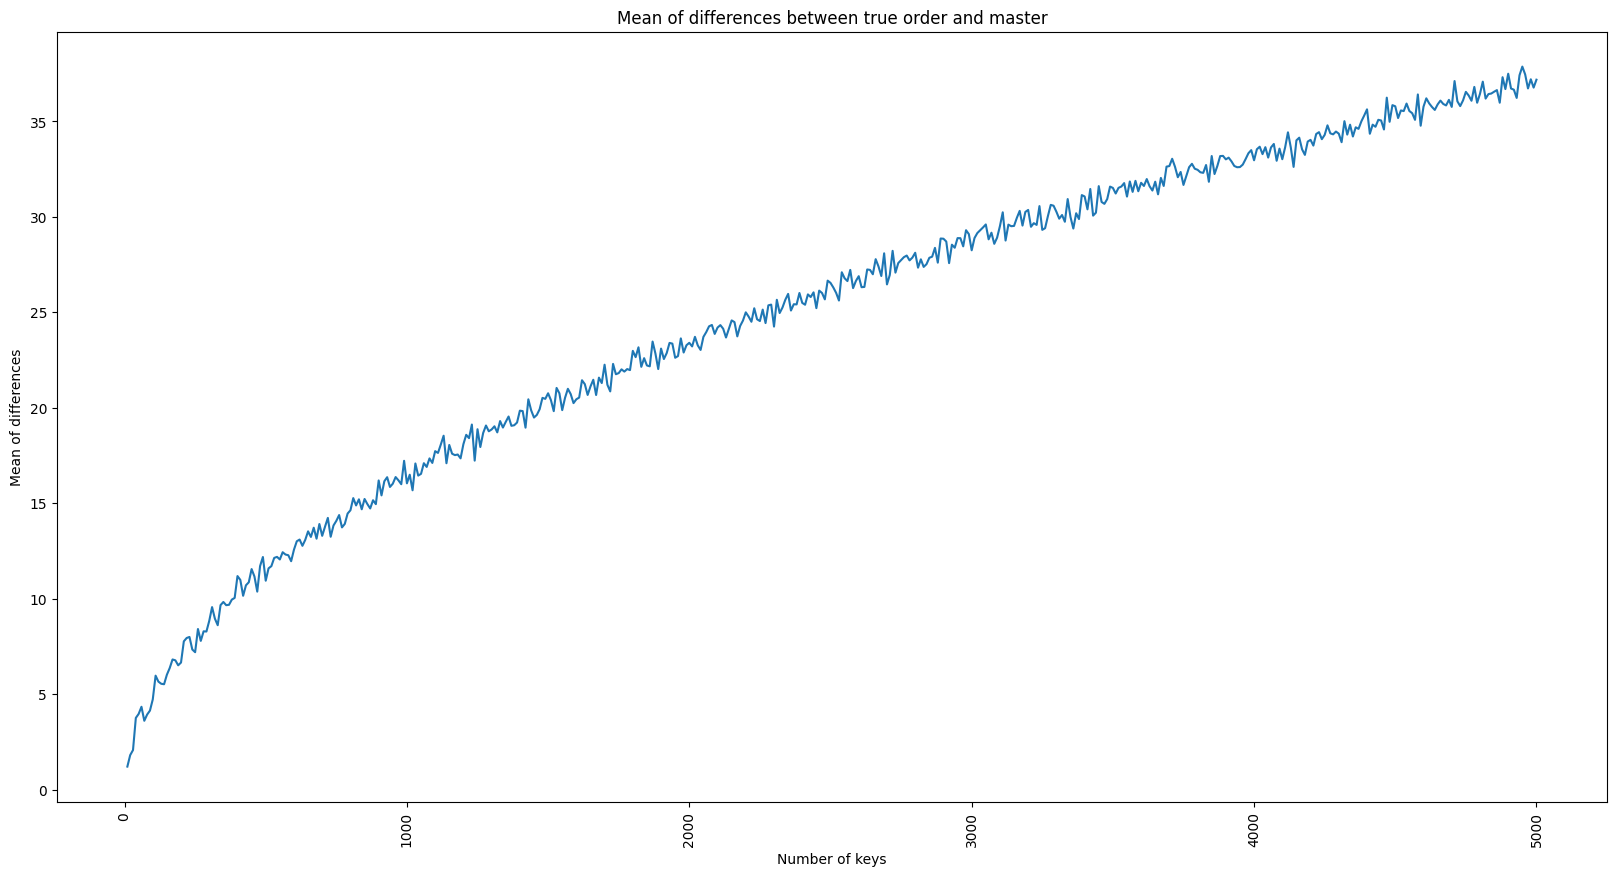

In [100]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_means, x="file", y="mean")
plt.xlabel("Number of keys")
plt.ylabel("Mean of differences")
plt.title("Mean of differences between true order and master")
plt.xticks(rotation=90)
plt.savefig("images/mean_of_differences.pdf", dpi=300)
plt.show()


## Graph of means as a fraction of the number of keys

In [96]:
df_means["fraction"] = df_means["mean"] / df_means["file"]

,file,mean,fraction
0,3650,31.838356,0.008723
1,2200,24.995455,0.011362
2,1090,17.106422,0.015694
3,510,11.584314,0.022714
4,3320,30.093373,0.009064


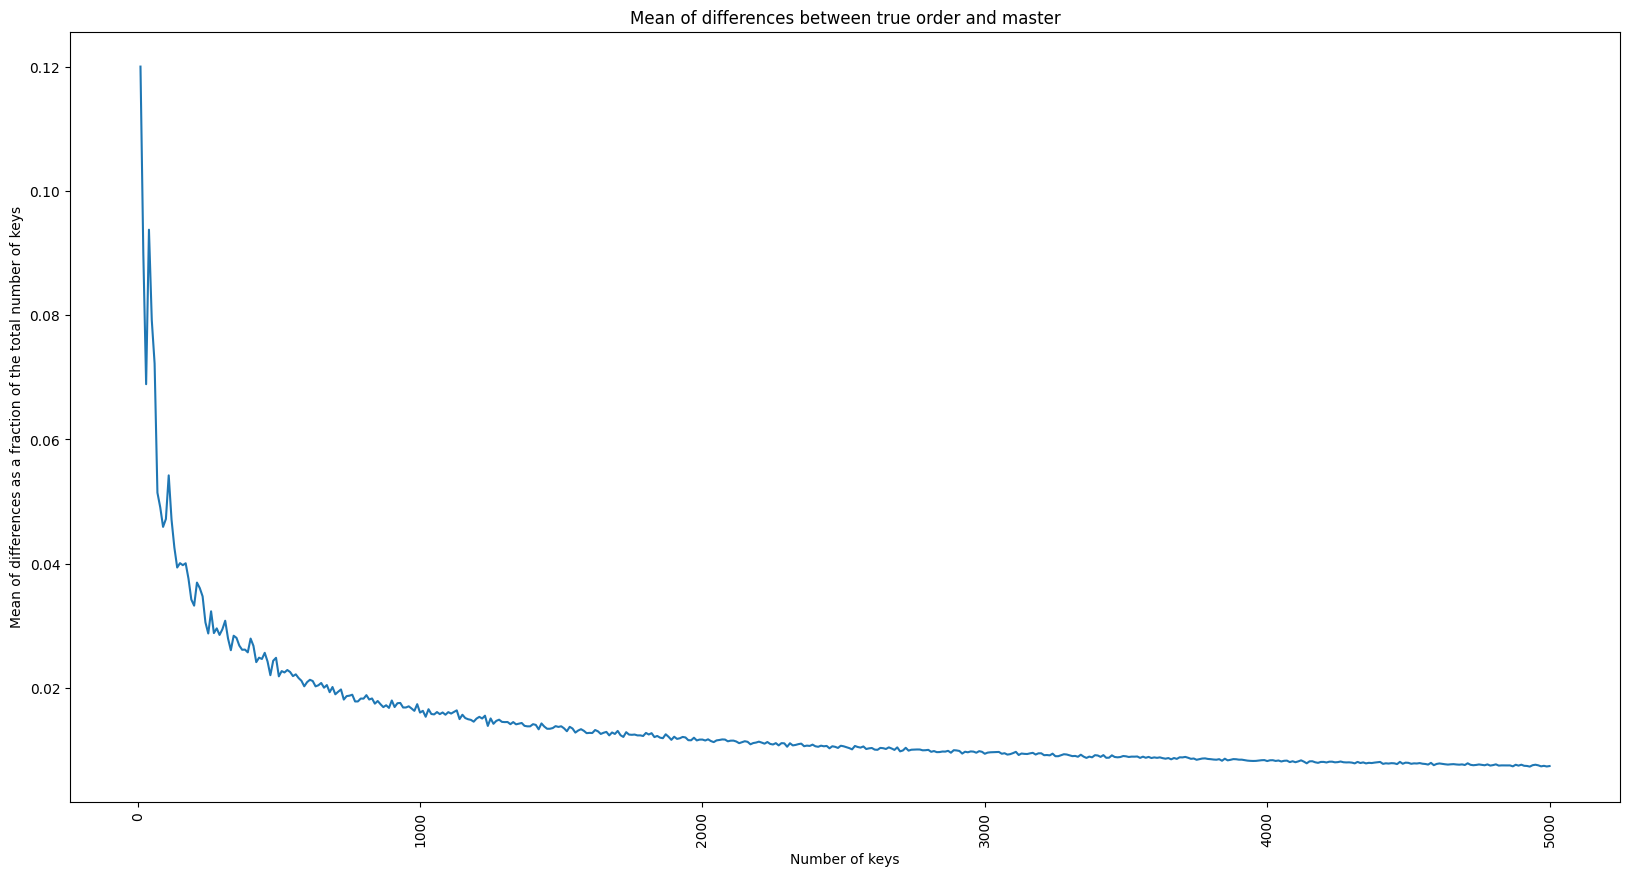

In [101]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_means, x="file", y="fraction")
plt.xlabel("Number of keys")
plt.ylabel("Mean of differences as a fraction of the total number of keys")
plt.title("Mean of differences between true order and master")
plt.xticks(rotation=90)
plt.savefig("images/mean_of_differences_fraction.pdf", dpi=300)
plt.show()